# Sklearn: Apprentissage non-supervisé (Partie 1)

URL : https://youtu.be/FTtzd31IAOw?si=xcb7eU8fH2IrWjnB

In [4]:
#importations
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

L’apprentissage supervisé est une technique d’apprentissage qui consiste à montrer à la machine des exemples X, y de ce qu’elle doit apprendre.

À l’inverse, l’apprentissage non-supervisé consiste à fournir à la machine uniquement des données X, et lui demander d’analyser la structure de ces données pour apprendre elle-même à réaliser certaines tâches.

## Clustering

Une des applications les plus populaires de l’apprentissage non-supervisé est le Clustering. Le principe est de laisser la machine apprendre à trier des données selon leurs ressemblances (et donc en analysant uniquement les features X).

Les algorithmes à connaitre :

- **K-Means :** Tres rapide, mais non-efficace sur les clusters non-convexes.
- **AgglomerativeClustering :** assez lent, mais efficace sur les données non-convexes.
- **DBSCAN :** efficace sur les données non-convexes, mais sélection du nombre de clusters automatique.

**Applications :** 
- Trier des documents, des photos, des tweets.
- Segmenter la clientèle d’une entreprise.
- Optimiser l’organisation d’un système informatique, etc…

In [8]:
#générer des données de test sous la forme de blobs
#make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0):
#génère 100 échantillons répartis sur 3 centres
#cluster_std détermine la dispersion des points autour de chaque centre
#random_state=0: fixe la graine aléatoire du générateur de nombres aléatoires, ce qui assure la reproductibilité des résultats
#X contient les caractéristiques des échantillons
#y est les étiquettes des clusters (non utilisées ici) 
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)

Text(0, 0.5, 'Caractéristique 2')

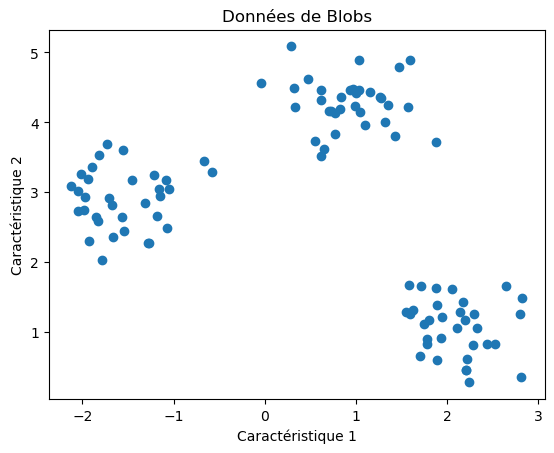

In [9]:
#tracer le graphique avec les deux premières caractéristiques des données générées
#les données X[:, 1] en fonction de X[:, 0]
#X[:, 0] représente toues les lignes de la 1ère colonne de X
#X[:, 1] représente toues les lignes de la 2ème colonne de X
plt.scatter(X[:, 0], X[:, 1])  
plt.title('Données de Blobs')    #titre du graphique
plt.xlabel('Caractéristique 1')  #axe des x
plt.ylabel('Caractéristique 2')  #axe des y

In [10]:
#créer un modèle KMeans en spécifiant:
#n_clusters=3: le nombre de clusters à former ainsi que le nombre de centroïdes à générer (par défaut=8)
#n_init=10: nombre d'initialisations, càd le nombre de fois l'algorithme doit être exécuté (par défaut='auto')
#max_iter=300: nombre maximal d'itérations de l'algorithme k-means pour une seule exécution (par défaut=300)
#init='k-means++': méthode d'initialisation (par défaut='k-means++')
model = KMeans(n_clusters=3, n_init=10, max_iter=300, init='k-means++')

#on peut juste écrire: model = KMeans(n_clusters=3)

In [11]:
#ajuster le modèle aux données X (entraîner le modèle)
model.fit(X)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [12]:
#prédire à quel cluster chaque point appartient, basé sur le modèle ajusté
#en utilisant model.labels_
model.labels_

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0])

In [13]:
#prédire à quel cluster chaque point appartient, basé sur le modèle ajusté
#en utilisant model.predict(X)
model.predict(X)

array([1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0])

In [14]:
#on obtient le même résultat!

In [15]:
#enregistrer les prédictions dans la variable predictions
predictions = model.predict(X)

Text(0, 0.5, 'Caractéristique 2')

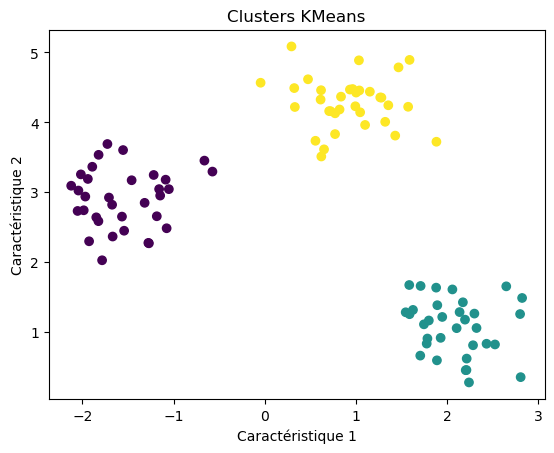

In [16]:
#tracer les points colorés selon le cluster auquel ils appartiennent
#les données X[:, 1] en fonction de X[:, 0]
#X[:, 0] représente toues les lignes de la 1ère colonne de X
#X[:, 1] représente toues les lignes de la 2ème colonne de X
#en précisant la couleur : c=predictions
plt.scatter(X[:, 0], X[:, 1], c=predictions)  
plt.title('Clusters KMeans')       #titre du graph
plt.xlabel('Caractéristique 1')    #axe des x
plt.ylabel('Caractéristique 2')    #axe des y

In [17]:
#afficher la position finale des centroïdes
model.cluster_centers_

array([[-1.55022199,  2.90542155],
       [ 2.08889087,  1.07930405],
       [ 0.92702654,  4.27385438]])

In [18]:
'''
On obtient un tableau numpy à 2 dimensions, avec 3 lignes et 2 colonnes:
- 3 lignes correspendent aux 3 centroïdes (n_clusters=3)
- 2 colonnes correspendent aux 2 variables de X (features, les caractéristiques 1 et 2)

- Chaque ligne du tableau correspond à un centre de cluster
- Chaque colonne correspond à une caractéristique dans l'espace de données

array([[-1.55022199,  2.90542155],   # Coordonées du 1er centroïde  (centre du cluster 0)
       [ 2.08889087,  1.07930405],   # Coordonées du 2ème centroïde (centre du cluster 1)
       [ 0.92702654,  4.27385438]])  # Coordonées du 3ème centroïde (centre du cluster 2)
'''

"\nOn obtient un tableau numpy à 2 dimensions, avec 3 lignes et 2 colonnes:\n- 3 lignes correspendent aux 3 centroïdes (n_clusters=3)\n- 2 colonnes correspendent aux 2 variables de X (features, les caractéristiques 1 et 2)\n\n- Chaque ligne du tableau correspond à un centre de cluster\n- Chaque colonne correspond à une caractéristique dans l'espace de données\n\narray([[-1.55022199,  2.90542155],   # Coordonées du 1er centroïde  (centre du cluster 0)\n       [ 2.08889087,  1.07930405],   # Coordonées du 2ème centroïde (centre du cluster 1)\n       [ 0.92702654,  4.27385438]])  # Coordonées du 3ème centroïde (centre du cluster 2)\n"

C:\Users\HP\AppData\Local\Temp\ipykernel_16688\1262019505.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # ajouter une légende


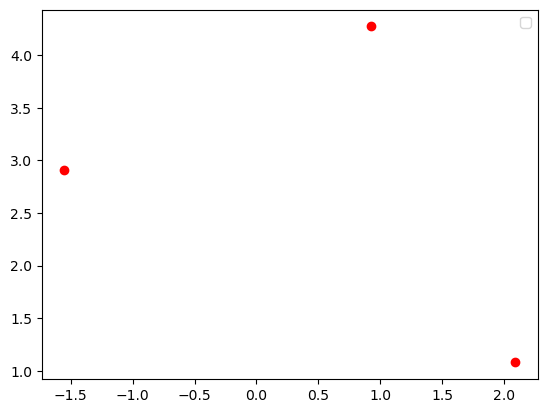

In [19]:
#afficher les centres des clusters
#model.cluster_centers_[:, 0]: tous les centroïdes de la 1ère caractéristique (feature)
#model.cluster_centers_[:, 1]: tous les centroïdes de la 2ème caractéristique (feature)
#c='r': couleur rouge
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='r')  
plt.legend()  # ajouter une légende

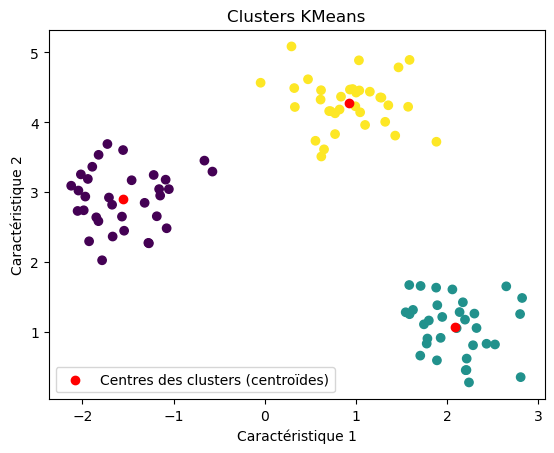

In [20]:
#tracer les points colorés selon le cluster auquel ils appartiennent

#les données X[:, 1] en fonction de X[:, 0]
#X[:, 0] représente toues les lignes de la 1ère colonne de X
#X[:, 1] représente toues les lignes de la 2ème colonne de X
#en précisant la couleur : c=predictions
plt.scatter(X[:, 0], X[:, 1], c=predictions)  
plt.title('Clusters KMeans')       #titre du graph
plt.xlabel('Caractéristique 1')    #axe des x
plt.ylabel('Caractéristique 2')    #axe des y

#afficher les centres des clusters

#model.cluster_centers_[:, 0]: tous les centroïdes de la 1ère caractéristique de X (feature)
#model.cluster_centers_[:, 1]: tous les centroïdes de la 2ème caractéristique de X (feature)
#c='r': couleur rouge
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='r', label='Centres des clusters (centroïdes)')  

plt.legend()  # ajouter une légende

In [21]:
#calculer l'inertia (lafonction coût du modèle)
model.inertia_

30.87053128014067

In [22]:
#c'est la somme des distances entre les points d'un cluster et 1 centroïde
#son unité dépend de l'unité qu'on travaille avec dans le dataset

In [23]:
#évaluer la qualité du clustering en utilisant la méthode score  
score = model.score(X)  
print('Score du modèle (inertie):', score)

Score du modèle (inertie): -30.87053128014068


In [24]:
#on obtient la même valeur négative de model.inertia_

### K-means clustering: Elbow method

**Parfois il est diffcile de savoir le nombre de clusters en regardant le dataset. Comment alors déterminer n_clusters?**

- **Elbow method:** Cette méthode est utilisée pour trouver le bon nombre de clusters. Elle détecte une zone de "coude" dans la minimisation du coût (inertia_).

Elle consiste en fait à tracer l'évolution du coût du modèle (inertia) en fonction du nombre de clusters, et de détecter dans le graphique une zone de 'coude', cette zone indique le nombre de clusters optimal, càd celui qui permet de réduire au maximum le coût du modèle tout en conservant un nombre raisonable de clusters. (Si le but est de simplement minimiser la fonction coût, il suffit alors de créer autant de clusters que l'on a de points dans le dataset, et donc le coût sera égal 0)

**Démonstration:**

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Text(0, 0.5, 'Coût du modèle (Inertia)')

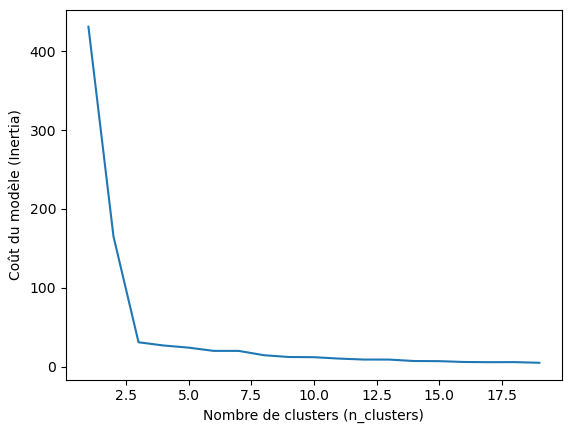

In [27]:
#créer une liste vide et l'enregistrer sous une variable appelée inertia
#elle va contenir les coûts des différents modèles pour des valeurs de k allant de 1 à 20
inertia = []

#créer des valeurs de k allant de 1 à 20
#c'est la rangée de valeurs qu'on veut tester
K_range = range(1, 20)

for k in K_range:
    model = KMeans(n_clusters=k).fit(X)     #modèle entraîné sur les données X
    inertia.append(model.inertia_)          #calculer le coûp du modèle (model.inertia_) et le faire rentrer dans la liste vide (inertia)

#tracer le graphique inertia (fonction coût) en fonction de K_range (les valeurs de k = n_clusters)
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters (n_clusters)')         #l'axe des abscisses (les x)
plt.ylabel('Coût du modèle (Inertia)')   #l'axe des ordonnées (les y)

In [28]:
#en regardant la zone de "coude", on voit que le nombre de clusters optimal pour ce modèle est effectivement n_clusters = 3